__The aim of this notebook is to scrape google map reviews from rossmans stores to apply sentiment analysis on it__

# Installation and import librairies

In [ ]:
!pip3 install googletrans
!pip3 install nltk
!pip3 install pycountry
!pip3 install langdetect
!pip3 install tweepy
!pip3 install webdriver-manager
!pip3 install beautifulsoup4

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/tanguypichelot/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache
/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85351/2160715986.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


# Using the driver to get url of stores

In [8]:
driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://maps.google.com/maps?cid=6906083300200111533"
url = "https://maps.google.com/maps?cid=3855649578829123897"
url = "https://maps.google.com/maps?cid=2048405725184281166"
driver.get(url)

In [9]:
driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/span[1]/span/span/span[2]/span[1]/button').click()
#to make sure content is fully loaded we can use time.sleep() after navigating to each page

time.sleep(3)


/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85351/3691381683.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/span[1]/span/span/span[2]/span[1]/button').click()


In [11]:
response = BeautifulSoup(driver.page_source, 'html.parser')
reviews = response.find_all('div', class_="MyEned")

# Loop with all rossmans stores

In [1]:
URL = "https://www.rossmann.de/de/filialen/index.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

resp = requests.get("https://www.rossmann.de/de/filialen/assets/data/locations.json").json()
list_url = []
for key in resp.keys():
    list_url.append(resp[key]['mapsUri'])

In [2]:
list_url

['https://maps.google.com/maps?cid=3450526851015880280',
 'https://maps.google.com/maps?cid=2048405725184281166',
 'https://maps.google.com/maps?cid=15700697549137604053',
 'https://maps.google.com/maps?cid=15702403724983709223',
 'https://maps.google.com/maps?cid=9391820110117470333',
 'https://maps.google.com/maps?cid=15123147030283495091',
 'https://maps.google.com/maps?cid=15270859623576125504',
 'https://maps.google.com/maps?cid=840539143479351338',
 'https://maps.google.com/maps?cid=15603680605995912085',
 'https://maps.google.com/maps?cid=12627512763764711105',
 'https://maps.google.com/maps?cid=16015148275148502460',
 'https://maps.google.com/maps?cid=5852903309290719967',
 'https://maps.google.com/maps?cid=2683684366881339981',
 'https://maps.google.com/maps?cid=7430973554138725192',
 'https://maps.google.com/maps?cid=10192048076737656357',
 'https://maps.google.com/maps?cid=7471875764728079793',
 'https://maps.google.com/maps?cid=14613003301817429304',
 'https://maps.google.c

In [5]:
list_reviews=[]


driver = webdriver.Chrome(ChromeDriverManager().install())

for url in list_url:
    driver.get(url)
    # Go to the url with reviews (could change if the navigator is different)
    driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/span[1]/span/span/span[2]/span[1]/button').click()
    
    time.sleep(3)
    # Get reviews list
    total_number_of_reviews = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[2]').text.split(" ")[0]
    total_number_of_reviews = int(total_number_of_reviews.replace(',','')) if ',' in total_number_of_reviews else int(total_number_of_reviews)

    scrollable_div = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]')
    # Scroll until the end of the page to get all reviews
    for i in range(0,(round(total_number_of_reviews/10 - 1))):
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                scrollable_div)
        time.sleep(1)
        
    response = BeautifulSoup(driver.page_source, 'html.parser')
    reviews = response.find_all('div', class_="MyEned")
    for elem in reviews:
        list_reviews.append(elem.text)

    



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/tanguypichelot/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache
/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85553/2945069585.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


https://maps.google.com/maps?cid=3450526851015880280


/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85553/2945069585.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/span[1]/span/span/span[2]/span[1]/button').click()
/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85553/2945069585.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  total_number_of_reviews = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[2]').text.split(" ")[0]
/var/folders/01/6y7zk8y17c9_zzdvd_qv7vwc0000gn/T/ipykernel_85553/2945069585.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  scrollable_div = driver.find_element_by_xpath('//*[@id="pane"]/div/div[1]/div/div/div[2]')


[]
https://maps.google.com/maps?cid=2048405725184281166
[]
https://maps.google.com/maps?cid=15700697549137604053
[]


In [ ]:
list_reviews = pd.DataFrame(list_reviews)
list_reviews.to_csv("list_reviews.csv")

# Textual Analysis

In [1]:
# Load reviews
list_reviews = reviews
#reviews=pd.read_csv("list_reviews.csv")
reviews.dropna(inplace=True)
df = reviews.to_frame(name="text")
df = df[df["text"]!='   ']

In [8]:
from googletrans import Translator
translator=Translator()

In [9]:
# Translate the reviews from de to en
df["text"]=df["text"].apply(lambda x: translator.translate(x).text)


In [14]:
df.to_csv("reviews_rosmann_en.csv")

## Positive/ negative reviews

total number:  4005
positive number:  2541
negative number:  862
neutral number:  602
                                                     0
0    I visited this branch for the first time today...
1    I was the employee and the manager was very ru...
2    Very spacious, space without end, super -clean...
3        Unfriendly\n\nSorry but some things don't go.
4    Unfortunately, I have experienced the employee...
..                                                 ...
857  1. unfriendly staff\n2. Keeping up constantly ...
858  They insulted and turned on me just because I'...
859  The staff unfriendly.It was very uncomfortable...
860  Personnel was very unfriendly and goodwill goe...
861  (Translated by Google) I was often every time ...

[862 rows x 1 columns]
                                                      0
0     A very nice modern shop.Friendly and helpful s...
1     A very nice shop!\nI always get what I need an...
2     Modern market with a large selection & nice st...
3     

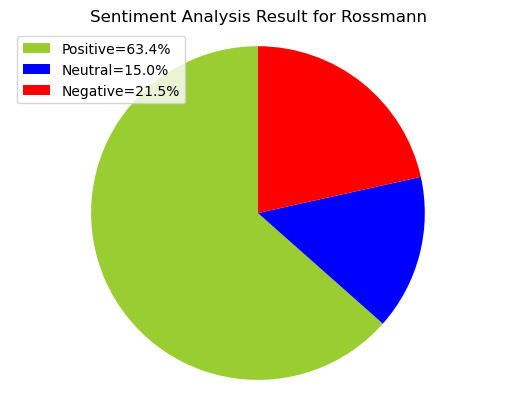

In [27]:
# Get positive and negative reviews
def percentage(part,whole):
 return 100 * float(part)/float(whole)

tweets = df["text"]
noOfTweet=len(tweets)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


sentiment_score = round((len(positive_list)-len(negative_list) ) / len(tweet_list), 2)
print(sentiment_score)

labels = ["Positive=" + positive + "%" , "Neutral="+ neutral + "%" ,"Negative=" + negative + "%"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for Rossmann")
plt.axis("equal")
plt.show()


## Analyze words distribution among negative comments

In [32]:

def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 5 



negative_list[0] = negative_list[0].apply(clean_text)
corpora = negative_list[0].to_list()

stopwords= stop_words

# Initializing TF-IDF Vectorizer with stopwords
vectorizer = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(corpora)

# Storing vocab
feature_names = vectorizer.get_feature_names()

result = []
for doc in corpora[0:1000]:
    df = {}
    df['full_text'] = doc
    df['top_keywords'] = get_keywords(vectorizer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)


final.to_csv("negative_keywords.csv")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'daren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'itse', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## TOPIC ANALYSIS

In [34]:

# Remove punctuation
negative_list['text_processed'] = \
negative_list[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
negative_list['text_processed'] = \
negative_list['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
negative_list['text_processed'].head()



def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = negative_list["text_processed"].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanguypichelot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.035*"unfriendly" + 0.015*"unfortunately" + 0.014*"branch" + 0.013*"staff" '
  '+ 0.012*"go" + 0.012*"cash" + 0.011*"rossmann" + 0.010*"employee" + '
  '0.010*"shopping" + 0.010*"employees"'),
 (1,
  '0.037*"unfriendly" + 0.028*"staff" + 0.023*"cash" + 0.021*"register" + '
  '0.010*"bad" + 0.010*"branch" + 0.010*"employee" + 0.009*"dont" + '
  '0.008*"long" + 0.008*"shop"'),
 (2,
  '0.032*"unfriendly" + 0.029*"cash" + 0.023*"register" + 0.018*"shop" + '
  '0.013*"cashier" + 0.009*"staff" + 0.008*"first" + 0.008*"also" + '
  '0.008*"time" + 0.007*"like"'),
 (3,
  '0.035*"unfriendly" + 0.013*"unfortunately" + 0.012*"go" + 0.012*"always" + '
  '0.011*"cash" + 0.010*"employees" + 0.009*"customers" + 0.008*"really" + '
  '0.008*"staff" + 0.008*"branch"'),
 (4,
  '0.030*"unfriendly" + 0.016*"unfortunately" + 0.014*"employees" + '
  '0.013*"work" + 0.012*"never" + 0.009*"cash" + 0.009*"register" + '
  '0.009*"small" + 0.009*"dont" + 0.005*"go"'),
 (5,
  '0.010*"customers" + 0.008*"em